# Function plots for lecture notes

In [1]:
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import math

plt.style.use("lecture.mplstyle")


## Gini and entropy

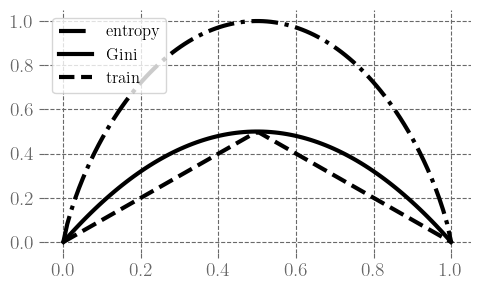

In [2]:
x=np.linspace(0,1,num=100)

def train(p):
    return 1-max(p,1-p)

def gini(p):
    return 2*p*(1-p)

def info(p):
    if p==0: return 0
    if p==1: return 0
    return -p*math.log(p,2)-(1-p)*math.log(1-p,2)

plt.figure(figsize=(5,3))
plt.plot(x,[info(p) for p in x], 'k-.',label='entropy')
plt.plot(x,[gini(p) for p in x], 'k-',label='Gini')
plt.plot(x,[train(p) for p in x],'k--',label='train')
plt.legend(loc="upper left", fontsize=12)
plt.box(False)
plt.tight_layout()
#plt.savefig("gini.png",dpi=300,bbox_inches='tight',pad_inches=0.1)
plt.show()

## Activation functions

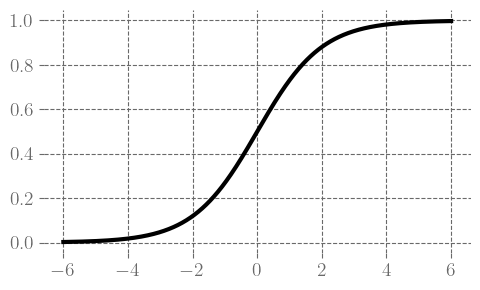

In [18]:
def logis(z):
#    return 1/(1+math.exp(-z))
    return 1/(1+np.exp(-z))

x=np.linspace(-6,6,num=1000)

plt.figure(figsize=(5,3))
#plt.plot(x,[logis(z) for z in x],'k-',linewidth=3)
#plt.plot(x,logis(x),'k-',linewidth=3)
plt.plot(x,logis(x),'k-')
#plt.title("logistic function")
plt.box(False)
plt.tight_layout()
plt.savefig("logistic.png",dpi=300,bbox_inches='tight',pad_inches=0.1)
plt.show()

Text(0.5, 1.0, 'tanh')

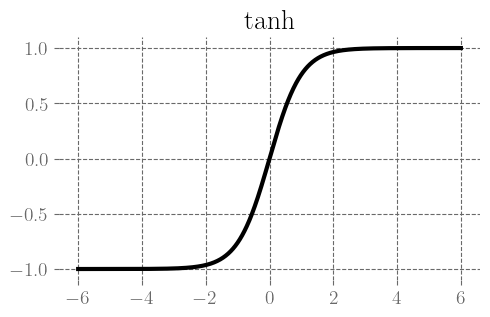

In [4]:
x=np.linspace(-6,6,num=1000)

plt.figure(figsize=(5,3))
plt.grid(True)
plt.plot(x,[math.tanh(z) for z in x],'k-',linewidth=3)
plt.tight_layout()
plt.title("logistic function",fontsize=12)
plt.box(False)

plt.title("tanh")

Text(0.5, 1.0, 'ReLU')

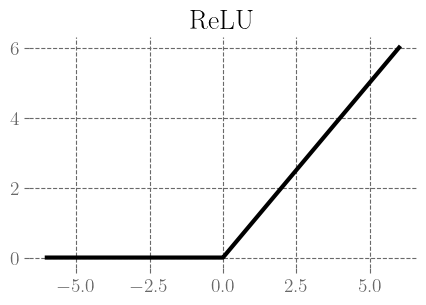

In [6]:
x=np.linspace(-6,6,num=1000)
plt.figure(figsize=(5,3))
plt.grid(True)
plt.plot(x,[max(z,0) for z in x],'k-')
plt.title("ReLU")

Text(0.5, 1.0, 'leaky ReLU')

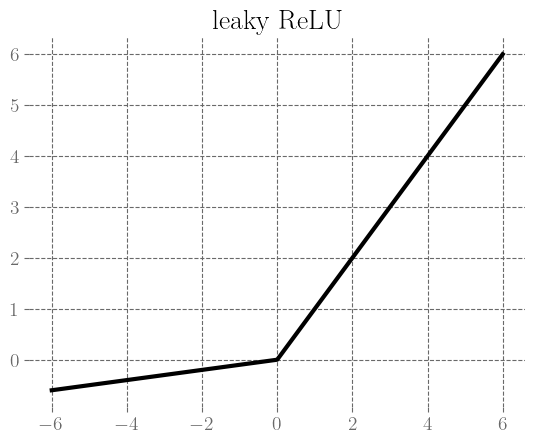

In [13]:
def leaky(x,alpha=0.1):
    return np.max([x,alpha*x],axis=0)
x=np.linspace(-6,6,num=1000)
#plt.plot(x,[max(z,0.1*z) for z in x],'b-')
plt.plot(x,leaky(x),'k-')
plt.title("leaky ReLU")

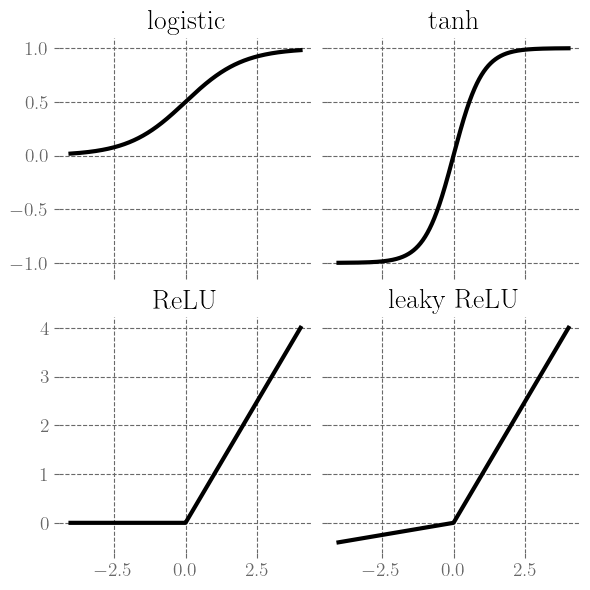

In [14]:
#plt.style.use("lecture.mplstyle")
_,axs=plt.subplots(2,2,figsize=(6,6),sharex=True,sharey="row")
x=np.linspace(-4,4,num=1000)
axs[0,0].plot(x,logis(x),"k-")
axs[0,0].set_title("logistic")
axs[0,1].plot(x,np.tanh(x),"k-")
axs[0,1].set_title("tanh")
axs[1,0].plot(x,leaky(x,alpha=0),"k-")
axs[1,0].set_title("ReLU")
axs[1,1].plot(x,leaky(x),"k-")
axs[1,1].set_title("leaky ReLU")
plt.tight_layout()
plt.savefig("activations.png",dpi=300)

## Losses

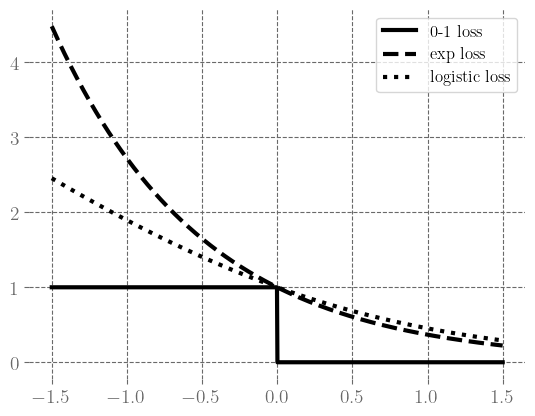

In [15]:
def zoloss(z):
    if z>=0:
        return 0
    return 1


x=np.linspace(-1.5,1.5,num=1000)
plt.plot(x,[zoloss(z) for z in x],'k-',label="0-1 loss")
plt.plot(x,[math.e**(-z) for z in x],'k--',label="exp loss")
plt.plot(x,[math.log(1+math.e**(-z),2) for z in x],'k:',label="logistic loss")
plt.legend(fontsize=12)
plt.savefig("losses.png",dpi=300,bbox_inches='tight',pad_inches=0.1)
plt.show()

## Beta distribution

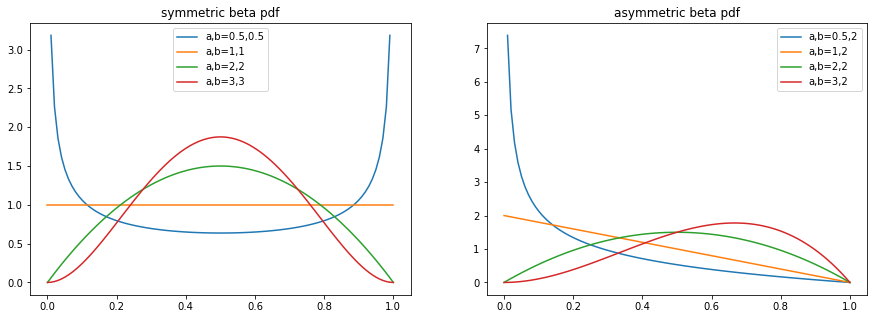

In [8]:
from scipy.stats import beta
x=np.linspace(0,1,100)
a,b=2,3
fig, axs = plt.subplots(1, 2,figsize=(15,5))
for a,b in zip([0.5,1,2,3],[0.5,1,2,3]):
    axs[0].plot(x,beta.pdf(x,a,b),label="a,b={},{}".format(a,b))
axs[0].legend()
axs[0].set_title("symmetric beta pdf")
for a,b in zip([0.5,1,2,3],[2,2,2,2]):
    axs[1].plot(x,beta.pdf(x,a,b),label="a,b={},{}".format(a,b))
axs[1].legend()
axs[1].set_title("asymmetric beta pdf")
plt.savefig("beta.png",dpi=300)
plt.show()

## sign vectors

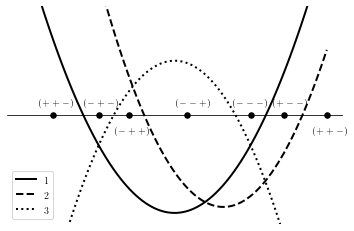

In [73]:
xx=np.linspace(-5,5,100)

y1=0.8*(xx-3)*(xx+3)
y2=1*(xx-4.2)*(xx+1)
y3=-(xx+2)*(xx-2)

fig, ax = plt.subplots()
ax.spines['bottom'].set_position(('data', 0))
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.plot(xx,y1,'k-',linewidth=2,label='1')
ax.plot(xx,y2,'k--',linewidth=2,label='2')
ax.plot(xx,y3,'k:',linewidth=2,label='3')
ax.scatter([-4,-2.5,-1.5,0.4,2.5,3.6,5],[0]*7,c='k',s=30,zorder=10)
ax.set_ylim(-8,8)
plt.annotate("($++-$)",(-4.5,0.7),fontweight='bold')
plt.annotate("($-+-$)",(-3,0.7),fontweight='bold')
plt.annotate("($-++$)",(-2,-1.4),fontweight='bold')
plt.annotate("($--+$)",(0,0.7),fontweight='bold')
plt.annotate("($---$)",(1.9,0.7),fontweight='bold')
plt.annotate("($+--$)",(3.2,0.7),fontweight='bold')
plt.annotate("($++-$)",(4.5,-1.4),fontweight='bold')
ax.set_xticks([])
ax.set_yticks([])
plt.legend()
plt.savefig('signs.png',dpi=300)